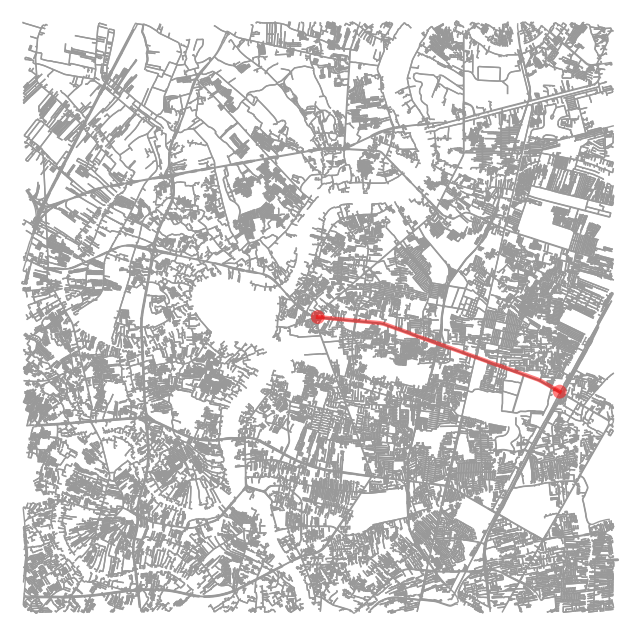

In [30]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# กำหนดจุดเริ่มต้นและจุดปลายทาง (latitude, longitude)
origin = (13.907551, 100.505125)  # กรุงเทพฯ
destination = (13.885183, 100.580845)  # พิษณุโลก  13.916783, 100.488291

# ดาวน์โหลดแผนที่ถนนในบริเวณต้นทาง (ขยายรัศมีจากจุดเริ่มต้น)
# G = ox.graph_from_point(origin, dist=100, network_type="drive"  )
G_drive = ox.graph_from_point(origin, dist=10000, network_type="drive")

# หาโหนดที่ใกล้ที่สุดจากจุดเริ่มต้นและปลายทาง
orig_node = ox.distance.nearest_nodes(G_drive, origin[1], origin[0])
dest_node = ox.distance.nearest_nodes(G_drive, destination[1], destination[0])

# ค้นหาเส้นทางที่สั้นที่สุดตามถนน (น้ำหนักคือระยะทาง)
route = nx.shortest_path(G_drive, orig_node, dest_node, weight="length")

# วาดแผนที่และเส้นทาง
fig, ax = ox.plot_graph_route(G_drive, route, route_linewidth=3, node_size=0, bgcolor="white")
# plt.title("Shortest Route from Bangkok to Phitsanulok")
# plt.show()


ระยะทางตามถนนจากจุด A ไป B: 17.12 กิโลเมตร


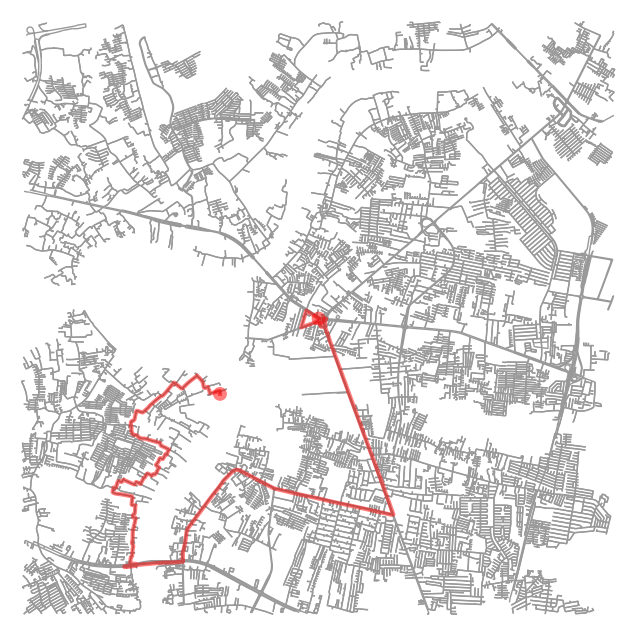

In [3]:
import osmnx as ox
import networkx as nx

# กำหนดจุดเริ่มต้นและจุดปลายทาง (latitude, longitude)
origin = (13.907681, 100.503205)  # กรุงเทพฯ
destination = (13.895680, 100.488432)  # พิษณุโลก (แก้ให้ตรงกับระยะทางจริง)

# ดาวน์โหลดเครือข่ายถนนในรัศมีที่ใหญ่ขึ้นเพื่อให้ครอบคลุมทั้งจุดเริ่มต้นและปลายทาง
G_drive = ox.graph_from_point(origin, dist=5000, network_type="drive")

# หาโหนดที่ใกล้ที่สุดจากจุดเริ่มต้นและปลายทาง
orig_node = ox.distance.nearest_nodes(G_drive, origin[1], origin[0])
dest_node = ox.distance.nearest_nodes(G_drive, destination[1], destination[0])

# คำนวณเส้นทางที่สั้นที่สุดโดยใช้ระยะทางจริงเป็นน้ำหนัก
route = nx.shortest_path(G_drive, orig_node, dest_node, weight="length")

# คำนวณระยะทางทั้งหมดของเส้นทาง (หน่วยเป็นเมตร)
route_length_meters = nx.shortest_path_length(G_drive, orig_node, dest_node, weight="length")

# แปลงระยะทางเป็นกิโลเมตร
route_length_km = route_length_meters / 1000

# แสดงผลลัพธ์
print(f"ระยะทางตามถนนจากจุด A ไป B: {route_length_km:.2f} กิโลเมตร")

# วาดแผนที่พร้อมเส้นทาง
fig, ax = ox.plot_graph_route(G_drive, route, route_linewidth=3, node_size=0, bgcolor="white")


In [1]:
import osmnx as ox
import networkx as nx
import folium

# กำหนดจุดเริ่มต้นและจุดปลายทาง (latitude, longitude)
origin = (13.987979, 100.611949)  # กรุงเทพฯ
destination = (13.996414, 100.673650)  # พิษณุโลก (แก้ให้ตรงกับระยะทางจริง)

# ดาวน์โหลดเครือข่ายถนนในรัศมีที่ใหญ่ขึ้นเพื่อให้ครอบคลุมทั้งจุดเริ่มต้นและปลายทาง
G_drive = ox.graph_from_point(origin, dist=7500, network_type="drive_service")

# หาโหนดที่ใกล้ที่สุดจากจุดเริ่มต้นและปลายทาง
orig_node = ox.distance.nearest_nodes(G_drive, origin[1], origin[0])
dest_node = ox.distance.nearest_nodes(G_drive, destination[1], destination[0])

# คำนวณเส้นทางที่สั้นที่สุดโดยใช้ระยะทางจริงเป็นน้ำหนัก
route = nx.shortest_path(G_drive, orig_node, dest_node, weight="length")

# คำนวณระยะทางทั้งหมดของเส้นทาง (หน่วยเป็นเมตร)
route_length_meters = nx.shortest_path_length(G_drive, orig_node, dest_node, weight="length")
route_length_km = route_length_meters / 1000

# แสดงผลลัพธ์
print(f"ระยะทางตามถนนจากจุด A ไป B: {route_length_km:.2f} กิโลเมตร")

# แปลงกราฟเป็น GeoDataFrame
edges = ox.graph_to_gdfs(G_drive, nodes=False, edges=True)
# edges = ox.graph_to_gdfs(G_drive, nodes=False, edges=True)

# สร้างแผนที่ด้วย Folium
m = folium.Map(location=origin, zoom_start=14, tiles="CartoDB Positron")  # คล้าย Google Maps

# เพิ่มเส้นทางลงในแผนที่
route_coords = [(G_drive.nodes[n]['y'], G_drive.nodes[n]['x']) for n in route]
folium.PolyLine(route_coords, color="blue", weight=5, opacity=0.7).add_to(m)

# เพิ่มจุดเริ่มต้นและปลายทาง
folium.Marker(origin, popup="จุดเริ่มต้น", icon=folium.Icon(color="green")).add_to(m)
folium.Marker(destination, popup="จุดปลายทาง", icon=folium.Icon(color="red")).add_to(m)

# แสดงแผนที่
m.save("map.html")
m


ระยะทางตามถนนจากจุด A ไป B: 7.09 กิโลเมตร


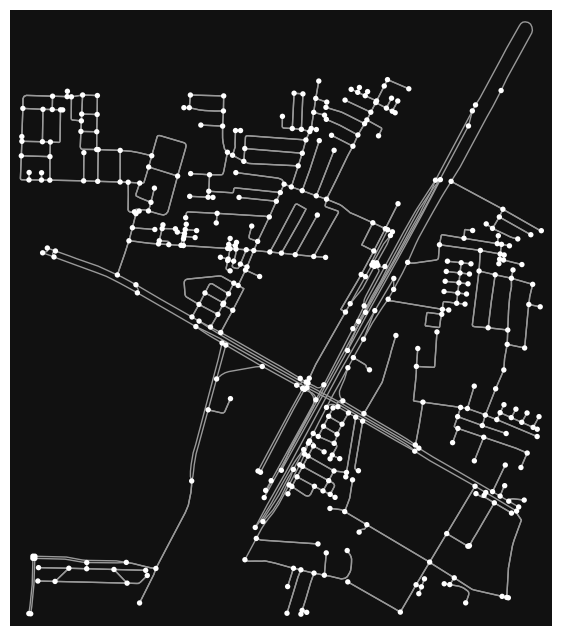

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [25]:
import osmnx as ox

origin = (13.885649, 100.579763)  # พิกัดของกรุงเทพฯ
G_drive = ox.graph_from_point(origin, dist=1000, network_type="drive")
ox.plot_graph(G_drive)

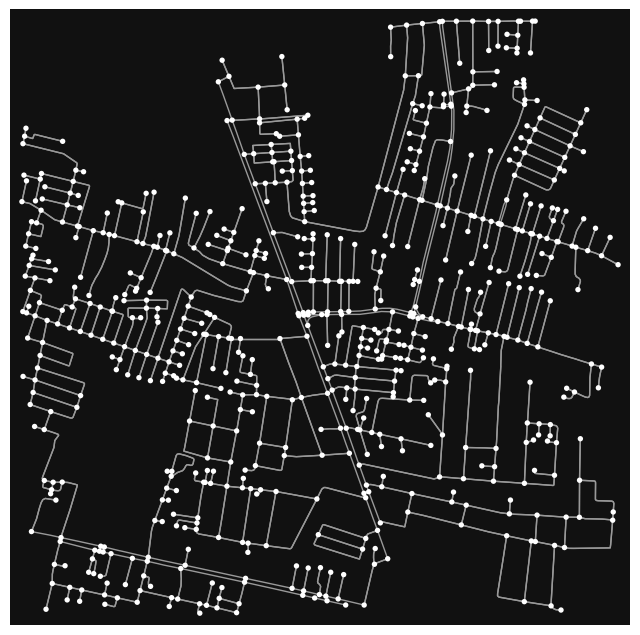

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [15]:
import osmnx as ox

origin = (13.886956, 100.512115)  # พิกัดของกรุงเทพฯ
G_drive = ox.graph_from_point(origin, dist=1000, network_type="drive")
ox.plot_graph(G_drive)

In [16]:
G_drive